<a href="https://colab.research.google.com/github/aniketxp/zk-proof-compression-ai/blob/main/Autoencoders_in_Blockchain_Rollups_%26_ZK_Proofs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0837
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0831
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0825
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0820
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0808
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0791
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0774
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0761
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0760
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0751
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0745
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0744
Epoch 13/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0738
Epoch 14/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0740
Epoch 15/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0741
Epoch 16/20
32/32 ━

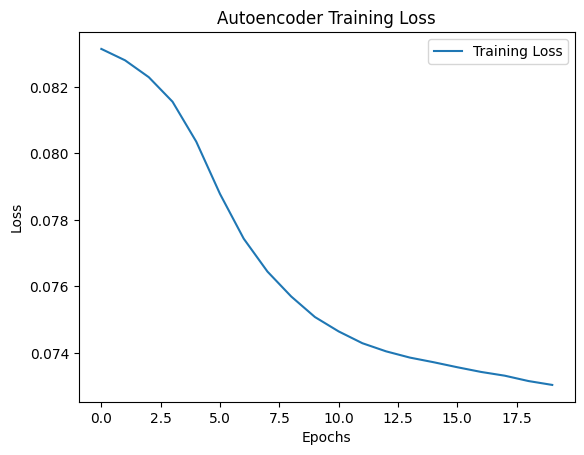

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


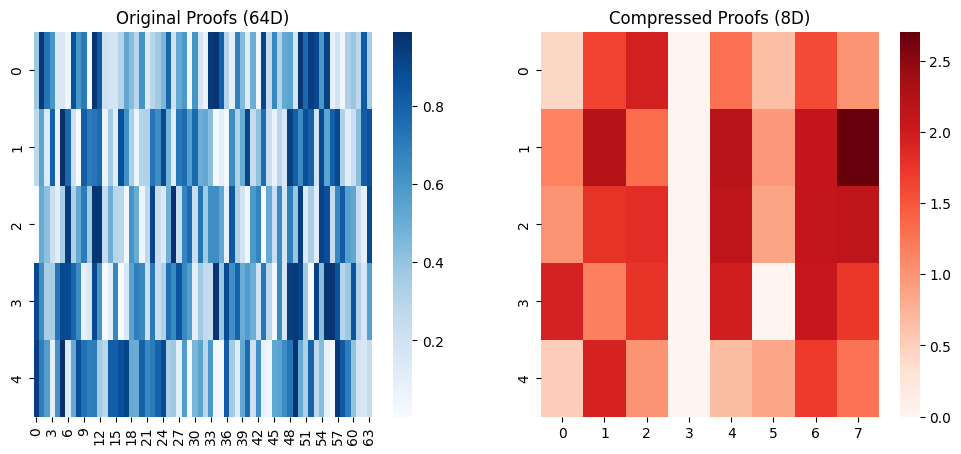

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


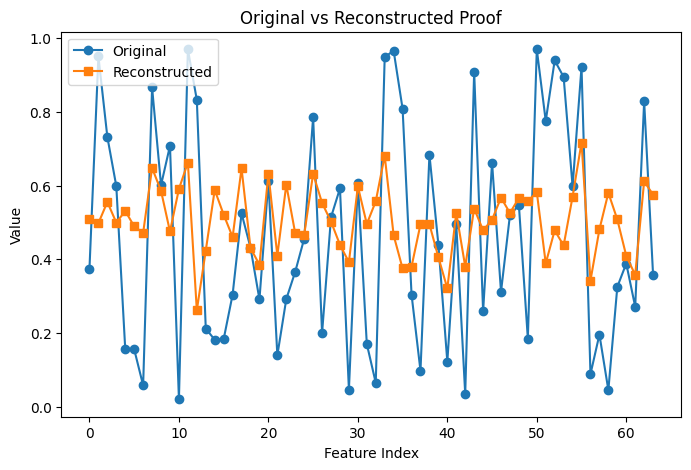

Compressed Proof:
 [[0.43076235 1.64438    1.9607744  0.         1.3068755  0.64608634
  1.5830698  1.001095  ]
 [1.1491251  2.2080436  1.3368684  0.         2.1884108  0.96152806
  2.0855255  2.70368   ]
 [1.003214   1.7728177  1.8220212  0.         2.1335049  0.8732573
  2.1057181  2.1518424 ]
 [1.9373013  1.1763906  1.7669058  0.         1.9815723  0.
  2.0578697  1.7259951 ]
 [0.5109555  1.9287937  0.99390525 0.         0.67324173 0.85497856
  1.6989441  1.2730708 ]]


In [10]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

# Generate synthetic zk-proof data (64D)
np.random.seed(42)
data = np.random.rand(1000, 64)  # 1000 samples, 64 features

# Define Autoencoder Model
input_dim = data.shape[1]
encoding_dim = 8  # Compressed size

# Encoder
encoder = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(input_dim,)),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(encoding_dim, activation="relu")
])

# Decoder
decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(input_dim, activation="sigmoid")  # Reconstruct original
])

# Full Autoencoder
autoencoder = tf.keras.Sequential([encoder, decoder])
autoencoder.compile(optimizer="adam", loss="mse")

# Train model
history = autoencoder.fit(data, data, epochs=20, batch_size=32, verbose=1)

# Plot Training Loss 📉
plt.plot(history.history['loss'], label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Autoencoder Training Loss")
plt.legend()
plt.show()

# Select a few samples
original_sample = data[:5]
compressed_sample = encoder.predict(original_sample)

# Heatmap: Original vs Compressed Proofs 🔥
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(original_sample, cmap="Blues", ax=axes[0])
axes[0].set_title("Original Proofs (64D)")

sns.heatmap(compressed_sample, cmap="Reds", ax=axes[1])
axes[1].set_title("Compressed Proofs (8D)")

plt.show()

# Reconstruct proof & compare 🔄
decoded_sample = autoencoder.predict(original_sample)

plt.figure(figsize=(8,5))
plt.plot(original_sample[0], label="Original", marker="o")
plt.plot(decoded_sample[0], label="Reconstructed", marker="s")
plt.xlabel("Feature Index")
plt.ylabel("Value")
plt.title("Original vs Reconstructed Proof")
plt.legend()
plt.show()

# Print compressed proof 🚀
print("Compressed Proof:\n", compressed_sample)
